In [1]:


import numpy as np
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/mall-customers/Mall_Customers.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')

df.rename(columns={'Genre':'Gender'},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.drop(['CustomerID'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

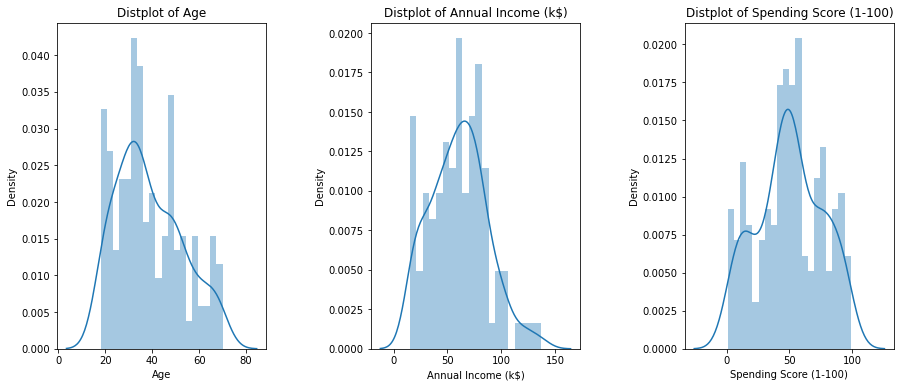

In [7]:
plt.figure(1,figsize=(15,6))
n = 0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n +=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

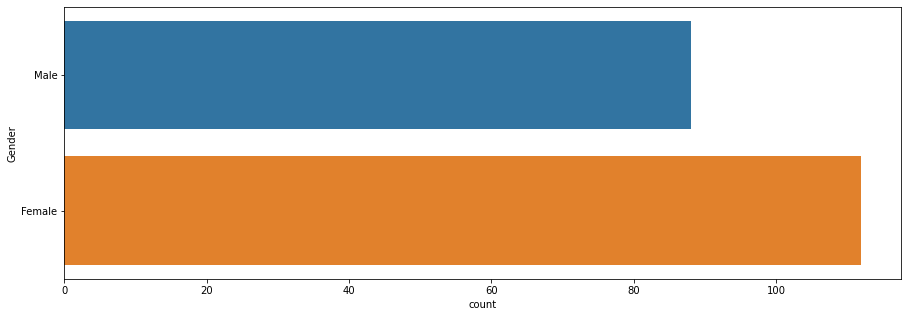

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

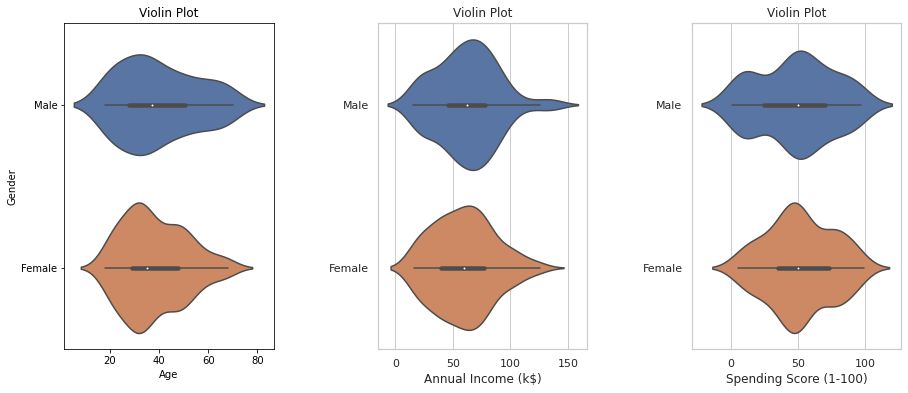

In [9]:
plt.figure(1,figsize=(15,6))
n = 0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n +=1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x = cols,y = 'Gender',data=df)
    plt.ylabel('Gender' if n== 1 else '')
    plt.title('Violin Plot')
plt.show()

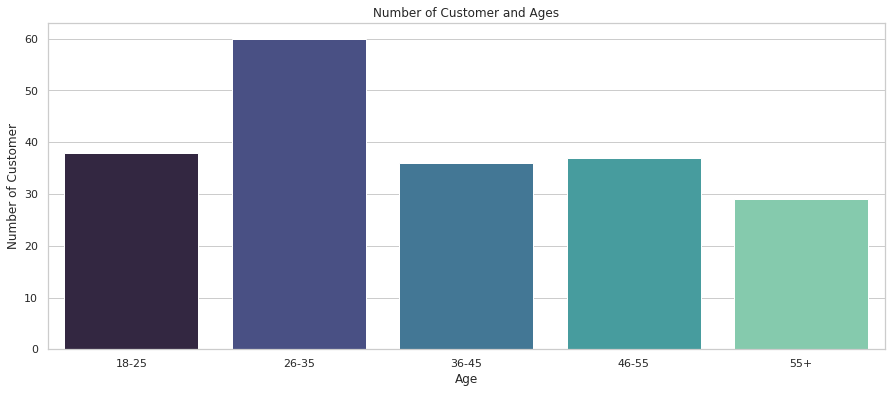

In [10]:
age_18_25 = df.Age[(df.Age >=18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >=26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >=36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >=46) & (df.Age <= 55)]
age_55_above = df.Age[(df.Age >= 56)]

age_x =["18-25","26-35","36-45","46-55","55+"]
age_y = [len(age_18_25.values),len(age_26_35.values),len(age_36_45),len(age_46_55),len(age_55_above)]

plt.figure(figsize = (15,6))
sns.barplot(x=age_x, y=age_y,palette = "mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

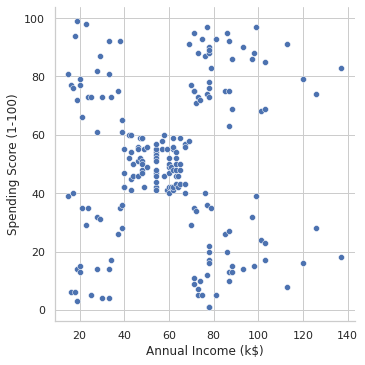

In [11]:
sns.relplot(x="Annual Income (k$)",y = "Spending Score (1-100)",data=df)

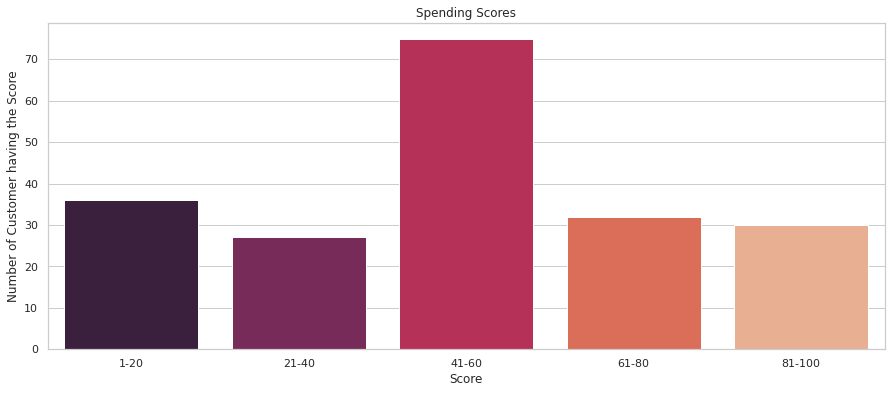

In [12]:
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]                                                                            
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]    

ssx= ["1-20","21-40","41-60","61-80","81-100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer having the Score")
plt.show()
                

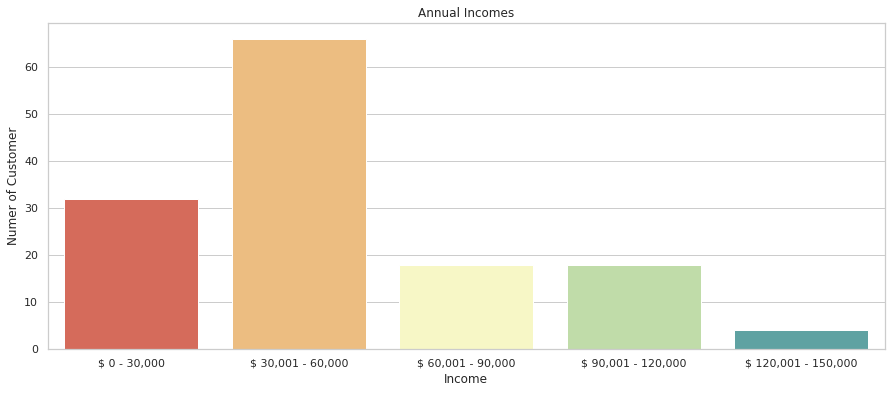

In [13]:
ai_0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai_31_60= df["Annual Income (k$)"][(df["Annual Income (k$)"] >=31)& (df["Annual Income (k$)"] <=60)]
ai_61_90= df["Annual Income (k$)"][(df["Annual Income (k$)"] >=61)& (df["Annual Income (k$)"] <=90)]
ai_61_90=df["Annual Income (k$)"][(df["Annual Income (k$)"] >=91)& (df["Annual Income (k$)"] <=120)]
ai_121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121) & (df["Annual Income (k$)"] <=150)]    

aix = ["$ 0 - 30,000","$ 30,001 - 60,000","$ 60,001 - 90,000","$ 90,001 - 120,000","$ 120,001 - 150,000"]
aiy = [len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_61_90.values),len(ai_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix,y=aiy,palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Numer of Customer")
plt.show()



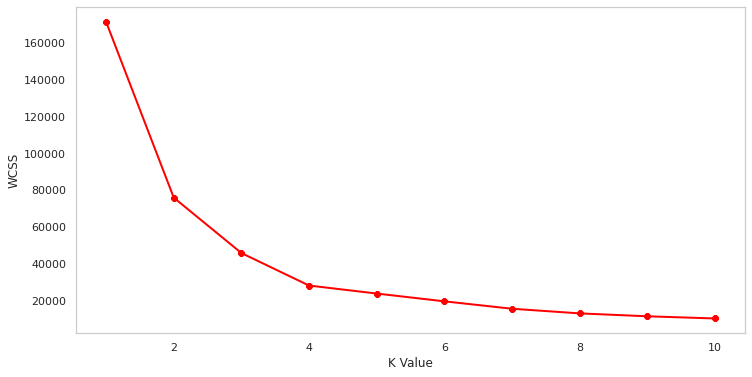

In [14]:
X1 = df.loc[:,["Age","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize =( 12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X1)

print(label)

[1 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 1 1 0 2 1 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0
 2 0 2 3 2 3 1 0 1 3 1 1 1 3 1 1 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 1 3 3 3 3
 3 1 3 1 1 3 3 1 3 3 1 3 3 1 1 3 3 1 3 1 1 1 3 1 3 1 1 3 3 1 3 1 3 3 3 3 3
 1 1 1 1 1 3 3 3 3 1 1 1 2 1 2 3 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 3 2
 0 2 0 2 0 2 0 2 0 2 0 2 3 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [16]:
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]]


<function matplotlib.pyplot.show(close=None, block=None)>

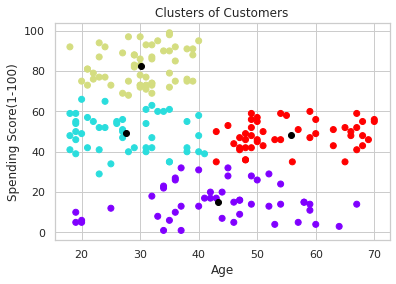

In [17]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show

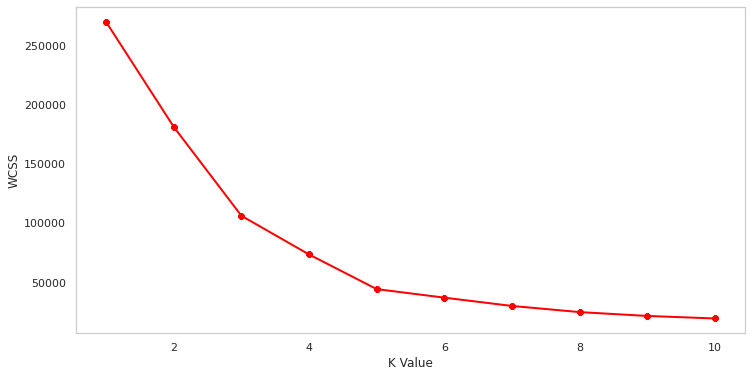

In [18]:
X2 = df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize =( 12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X2)

print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [20]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


<function matplotlib.pyplot.show(close=None, block=None)>

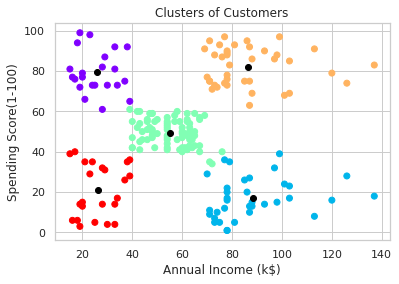

In [21]:
plt.scatter(X2[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show

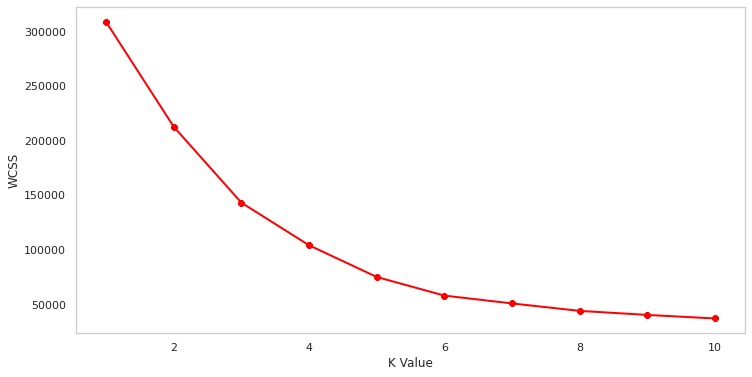

In [22]:
X3 = df.iloc[:,1:]


wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize =( 12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [23]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X3)

print(label)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 2 4 0 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 0 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


In [24]:
print(kmeans.cluster_centers_)

[[43.08860759 55.29113924 49.56962025]
 [25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]]


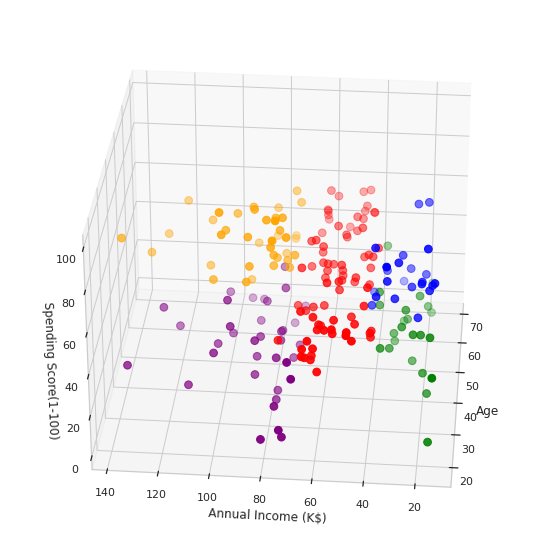

In [25]:
cluster = kmeans.fit_predict(X3)
df["label"] = cluster


from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection = '3d')

ax.scatter(df.Age[df.label == 0 ],df["Annual Income (k$)"][df.label == 0],df["Spending Score (1-100)"][df.label == 0], c = 'blue',s=60)
ax.scatter(df.Age[df.label == 1 ],df["Annual Income (k$)"][df.label == 1],df["Spending Score (1-100)"][df.label == 1], c = 'red',s=60)
ax.scatter(df.Age[df.label == 2 ],df["Annual Income (k$)"][df.label == 2],df["Spending Score (1-100)"][df.label == 2], c = 'green',s=60)
ax.scatter(df.Age[df.label == 3 ],df["Annual Income (k$)"][df.label == 3],df["Spending Score (1-100)"][df.label == 3], c = 'orange',s=60)
ax.scatter(df.Age[df.label == 4 ],df["Annual Income (k$)"][df.label == 4],df["Spending Score (1-100)"][df.label == 4], c = 'purple',s=60)


ax.view_init(30,185)


plt.xlabel("Age")
plt.ylabel("Annual Income (K$)")
ax.set_zlabel('Spending Score(1-100)')



plt.show()